# 1. Numerical Data Ploting
### a. relplot()
### b. scatterplot()
### c. lineplot()

# 2. Categorical Data Ploting
### a. catplot()
### b. boxplot()
### c. stripplot()
### d. swarmplot()


# 3. Visualizing Distribution Of Data
### a. distplot()
### b. kdeplot()
### c. jointplot()
### d. rugplot()


# 4. Linear Regression And Relationship
### a. regplot()
### b. lmplot()

# 5. Numerical Data Ploting
### a. figure styling()
### b. axes styling()
### c. colour palette()

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [7]:
sns.set(style = 'darkgrid')

# Load Dataset From SNS

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Numerical Data Plotting

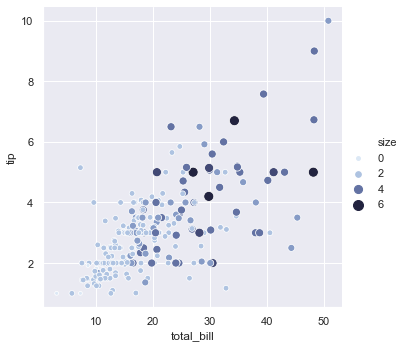

In [9]:
sns.relplot(x = 'total_bill', 
            y = 'tip', 
            data = tip, 
            hue = 'size', 
#             style = 'time',
            palette = 'ch:r=-0.1, l = 0.9',
            size = 'size',
            sizes = (15, 100)
           )

In [10]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

# Line Plot

In [11]:
from numpy.random import randn

## Non Sorted Data

In [12]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])
df.head

<bound method NDFrame.head of          time      value
0   -0.923631   0.219319
1   -0.203271   2.436480
2   -1.049858   2.318763
3   -0.719737   2.375252
4   -2.097807   0.690969
..        ...        ...
495 -2.698963  13.840138
496 -2.122610  12.215044
497 -1.260751  11.854064
498 -0.878886  12.630305
499 -1.259935  13.254449

[500 rows x 2 columns]>

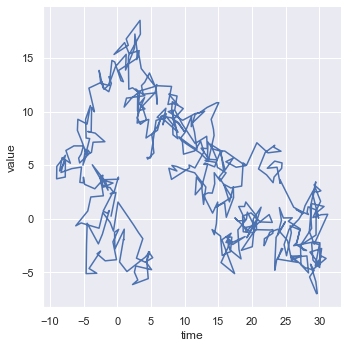

In [13]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = False)

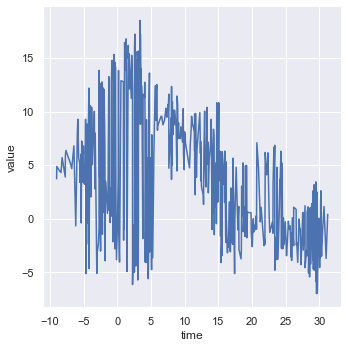

In [14]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

## Sorted Data

In [15]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))
df.head()

,time,value
0,0,0.684619
1,1,0.465295
2,2,-1.162021
3,3,0.480784
4,4,0.248398


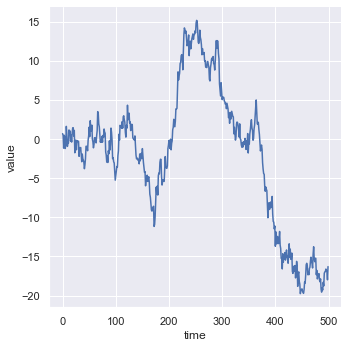

In [16]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)

In [17]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


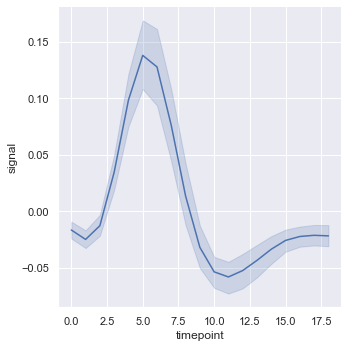

In [18]:
sns.relplot(x = 'timepoint', y = 'signal', 
            kind = 'line', 
            data = fmri,
#             ci = False  # Hide Confidence Level 
           )
#Its line with 95% confidence

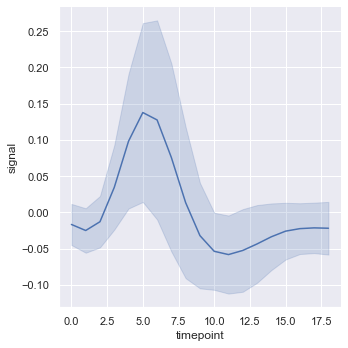

In [19]:
sns.relplot(x = 'timepoint', y = 'signal', 
            kind = 'line', 
            data = fmri,
            ci = 'sd'  
           )
#Its line with standard deviation

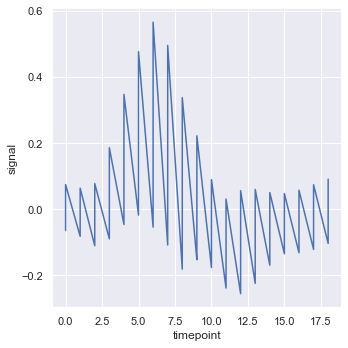

In [20]:
sns.relplot(x = 'timepoint', y = 'signal', 
            estimator = None,
            kind = 'line', 
            data = fmri,
           )
#Its line without confidence level

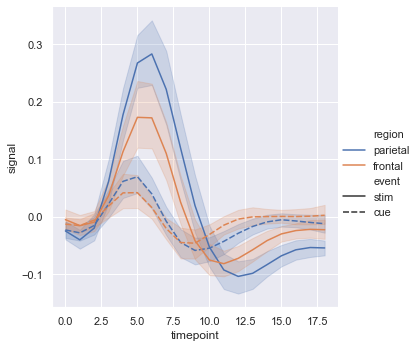

In [21]:
sns.relplot(x = 'timepoint', y = 'signal', 
            hue = 'region', 
            style = 'event', 
            kind = 'line', 
            data = fmri)

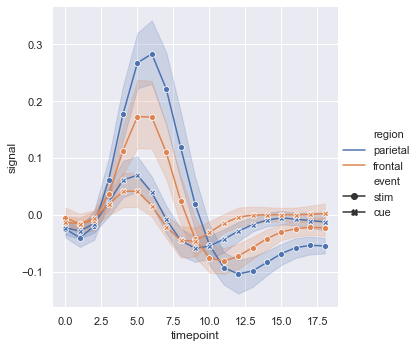

In [22]:
sns.relplot(x = 'timepoint', y = 'signal', 
            hue = 'region', 
            style = 'event', 
            kind = 'line', 
            data = fmri,
            markers = True,
            dashes = False
           )

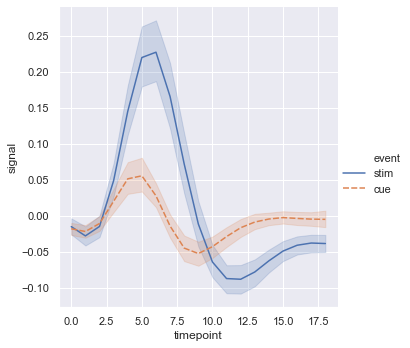

In [23]:
sns.relplot(x = 'timepoint', y = 'signal', 
            hue = 'event', 
            style = 'event', 
            kind = 'line', 
            data = fmri,
           )

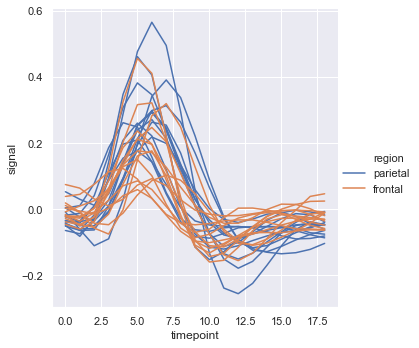

In [24]:
sns.relplot(x = 'timepoint', y = 'signal', 
            hue = 'region', 
            units = 'subject', 
            estimator = None,
            kind = 'line', 
            data = fmri.query("event == 'stim'")
           )

In [25]:
dots = sns.load_dataset('dots').query('align == "dots"')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


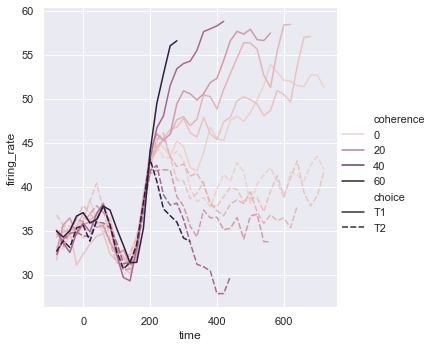

In [26]:
sns.relplot(x = 'time', y = 'firing_rate', 
            data = dots, 
            kind = 'line', 
            hue = 'coherence',
            style = 'choice'
           )

## Changing Colour Palette 

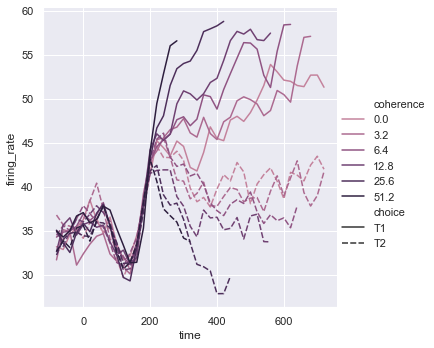

In [27]:
palette = sns.cubehelix_palette(light = 0.6, n_colors = 6)
sns.relplot(x = 'time', y = 'firing_rate', 
            data = dots, 
            kind = 'line', 
            hue = 'coherence',
            style = 'choice',
            palette = palette
           )

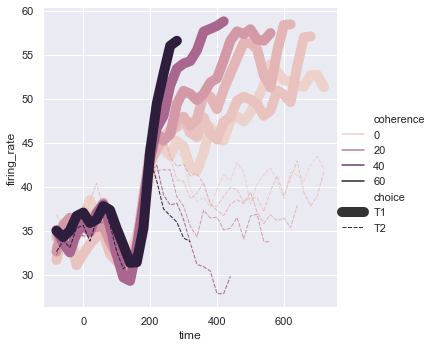

In [28]:
sns.relplot(x = 'time', y = 'firing_rate', 
            data = dots, 
            kind = 'line', 
            hue = 'coherence',
            size = 'choice',
            style = 'choice',
            sizes = (1, 10)
           )

In [29]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))
df

,time,value
0,2019-06-02,-0.444350
1,2019-06-03,1.311333
2,2019-06-04,0.431401
3,2019-06-05,1.836752
4,2019-06-06,1.634774
...,...,...
495,2020-10-09,-14.453782
496,2020-10-10,-13.735376
497,2020-10-11,-12.347273
498,2020-10-12,-12.502344


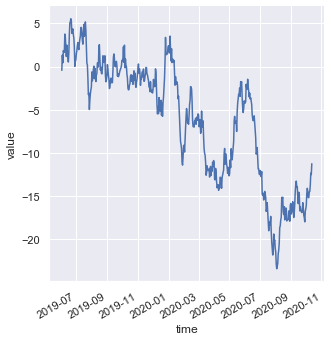

In [30]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()      #Date style here rotated

# Multiple Plot

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Column Wise

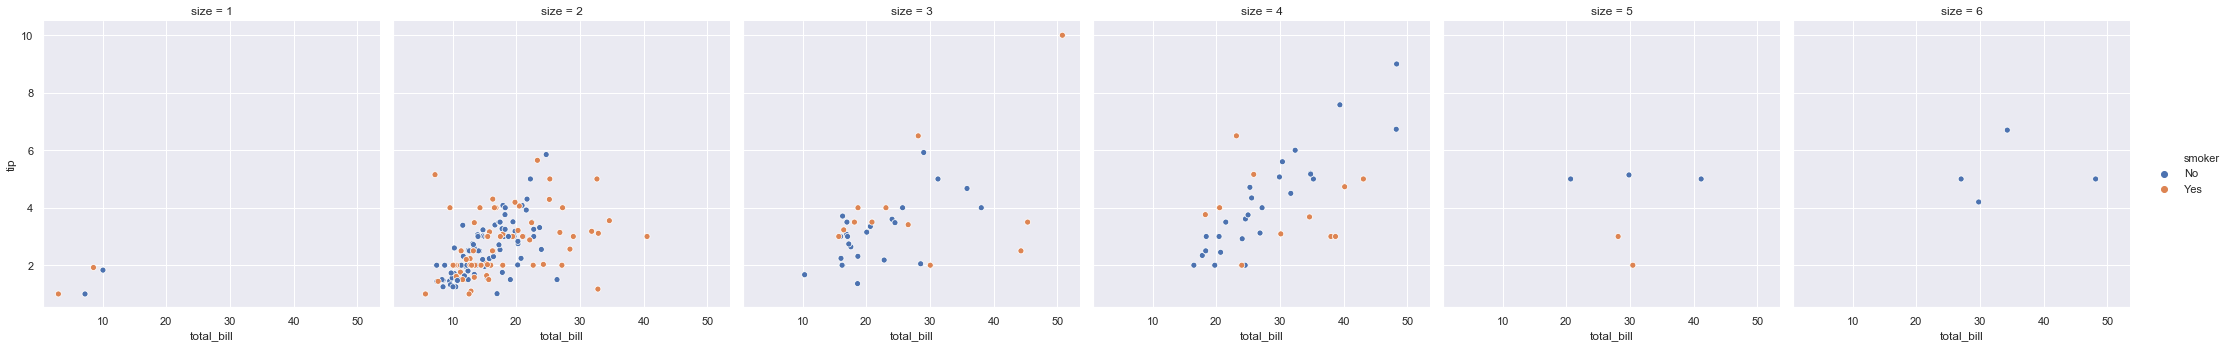

In [32]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker',col = 'size',data = tips)
# For Vertical Write row insted of col

## Both Row And Col Wise 

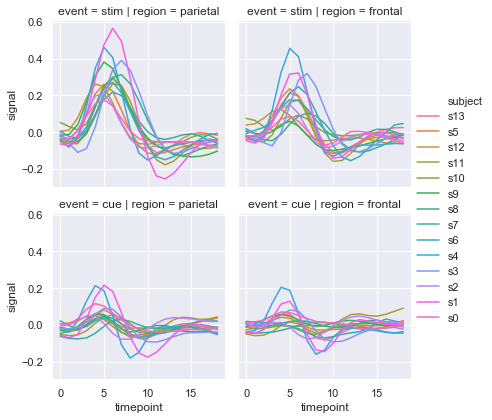

In [33]:
sns.relplot(x = 'timepoint', y = 'signal',
            hue = 'subject',
            col = 'region',
            row = 'event',
            height = 3,
            kind = 'line',
            estimator = None,
            data = fmri)

## Multi Dimensional

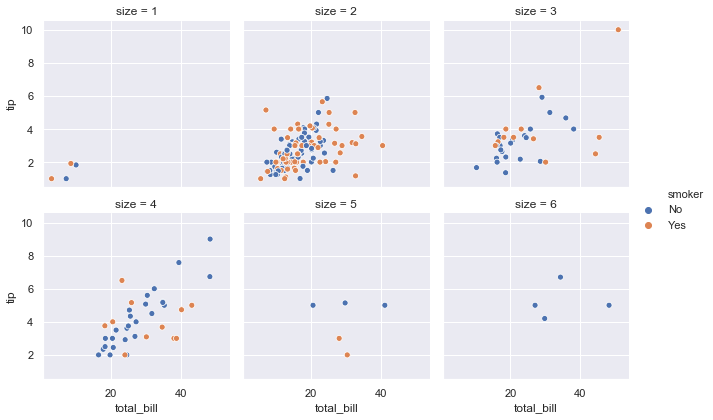

In [34]:
sns.relplot(x = 'total_bill', y = 'tip',
            hue = 'smoker',
            col = 'size',
            data = tips, 
#             kind = 'line',
            col_wrap = 3, 
            height = 3)

In [35]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


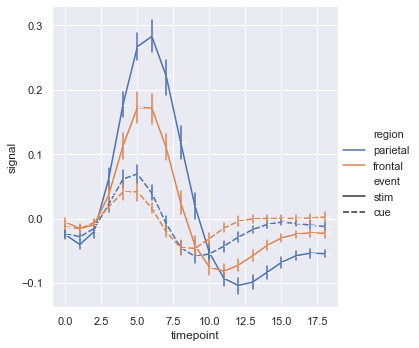

In [36]:
sns.relplot(x = 'timepoint', y = 'signal',
            kind = 'line',  
            data = fmri,
            style = 'event',
            hue = 'region',
            marker = True,
            ci = 60,
            err_style = 'bars'
           )

# Categorical Data Plotting

In [37]:
titanic = sns.load_dataset('titanic')

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Catplot 

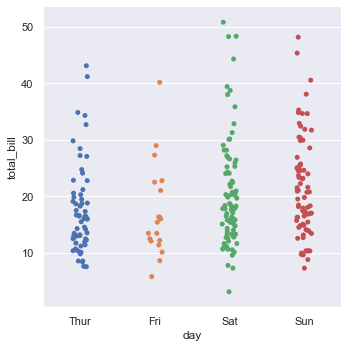

In [39]:
sns.catplot(x = 'day', y = 'total_bill', 
            data = tips)

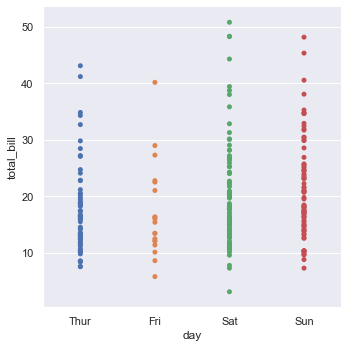

In [40]:
sns.catplot(x = 'day', y = 'total_bill', 
            data = tips,
            jitter = False
           )

## Swarm Plot

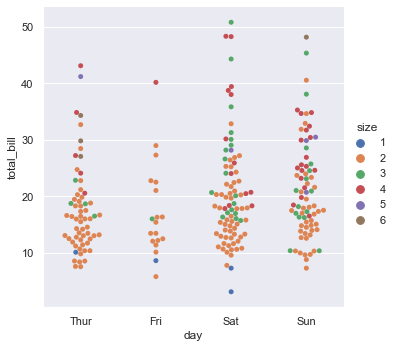

In [41]:
# Prevent Overlapping
sns.catplot(x = 'day', y = 'total_bill', 
            data = tips,
            kind = 'swarm',
            hue = 'size',
           )

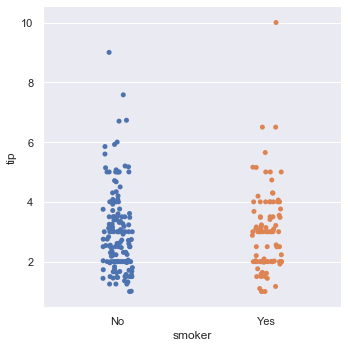

In [42]:
sns.catplot(x = 'smoker', 
            y = 'tip', 
            data = tips, 
            order = ['No', 'Yes']   # Cahnge Order Of X axis data
           )

## Box Plot

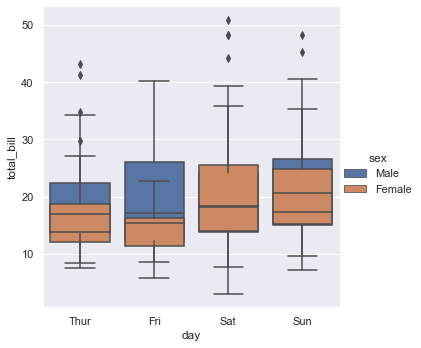

In [43]:
sns.catplot(x = 'day', y = 'total_bill', 
            kind = 'box', 
            data = tips, 
            hue = 'sex',
           dodge = False)

## Boxen Plot 

In [44]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


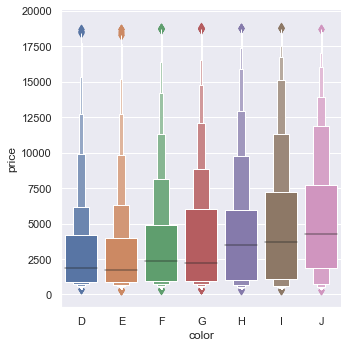

In [45]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

## Violin Plot 

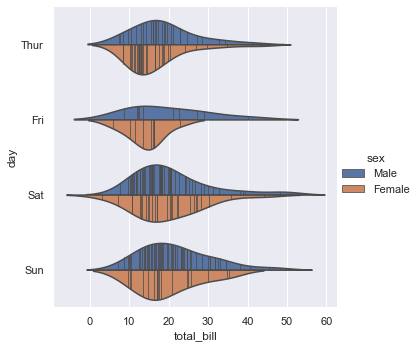

In [46]:
sns.catplot(x = 'total_bill', y = 'day', 
            kind = 'violin',
            hue = 'sex',
            data = tips,
            split = True,
            inner = 'stick'
           )

## Violin(KDE) And Swarn Plot Together 
Categorical vs NumericAL

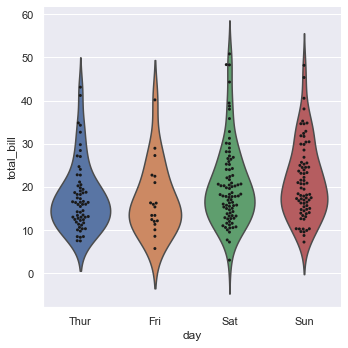

In [47]:
g = sns.catplot(x = 'day', y = 'total_bill', 
            kind = 'violin', 
            data = tips, 
            inner = None)

sns.swarmplot(x = 'day', y = 'total_bill', 
              color = 'k', # Black
              size = 3,
              data = tips,
              ax = g.ax
             )


Categorical vs Categorical

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


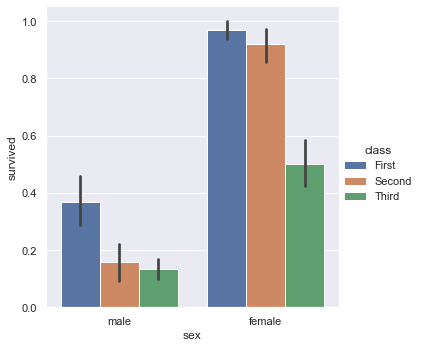

In [49]:
sns.catplot(x = 'sex', y = 'survived',
            hue = 'class',
            kind = 'bar',
            data = titanic
           )

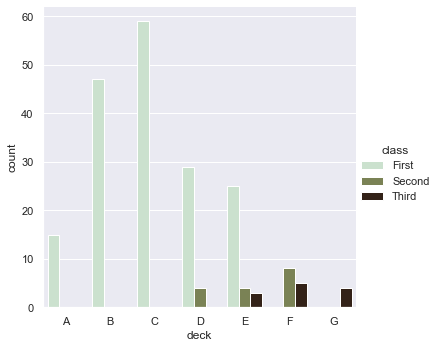

In [50]:
sns.catplot(x = 'deck', 
            hue = 'class',
            kind = 'count',
            data = titanic,
            palette = 'ch:0.95'
           )

## Point Plot 

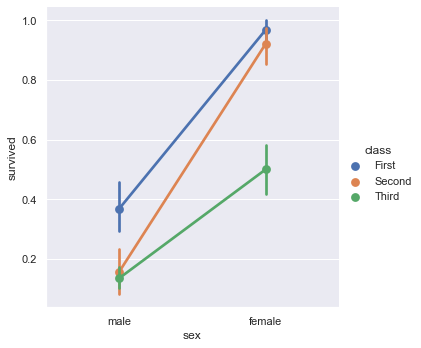

In [51]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

# Visualizing Distribution Of The Data

## Univariate 

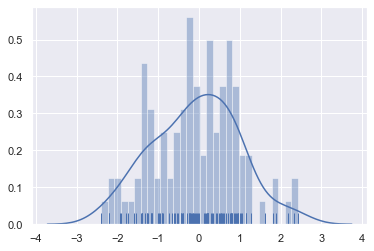

In [52]:
X = randn(100)
sns.distplot(X
#              , kde = False
             , rug = True
             , bins = 30
#              , kde = True, hist = False
            )

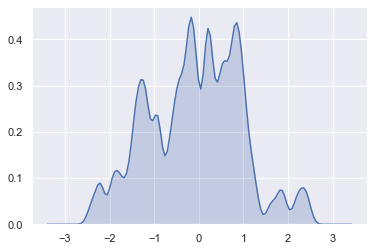

In [53]:
sns.kdeplot(X, 
            shade = True,
            bw = 0.1, # As BW increases curve becomes smooth
            cut = 10  # Size Of Graph
           )

## Bivariate 

In [54]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [55]:
X = tips['total_bill']
y = tips['tip']

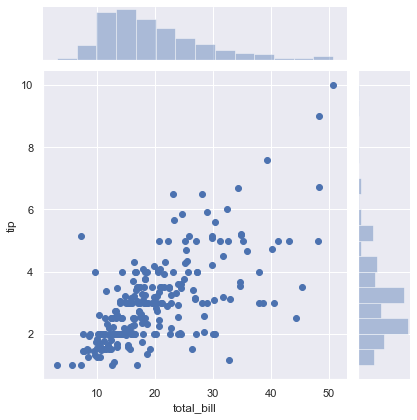

In [56]:
sns.jointplot(x = X, y = y,)

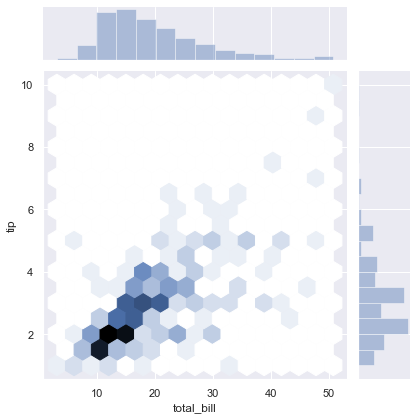

In [57]:
sns.set()
sns.jointplot(x = X, y = y,
             kind = 'hex')

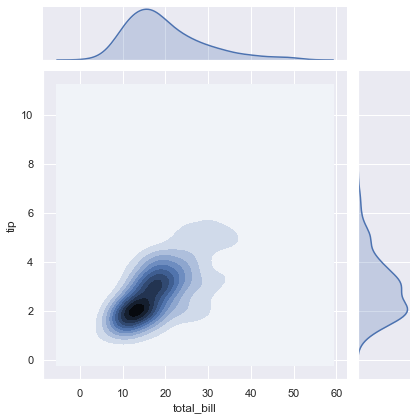

In [58]:
sns.jointplot(x = X, y = y,
             kind = 'kde')

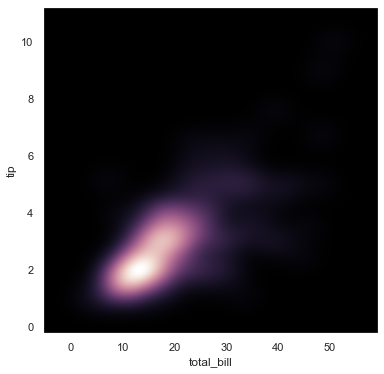

In [59]:
f, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(X, y, cmap = cmap, n_levels = 1000, shade = True)

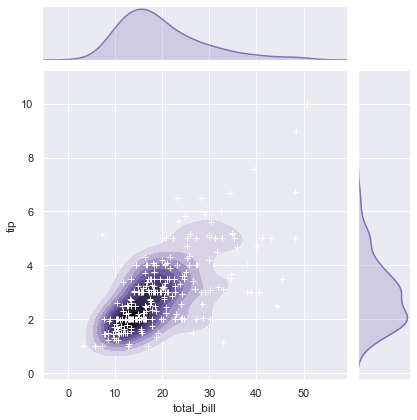

In [60]:
g = sns.jointplot(X, y, kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0) 

In [61]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


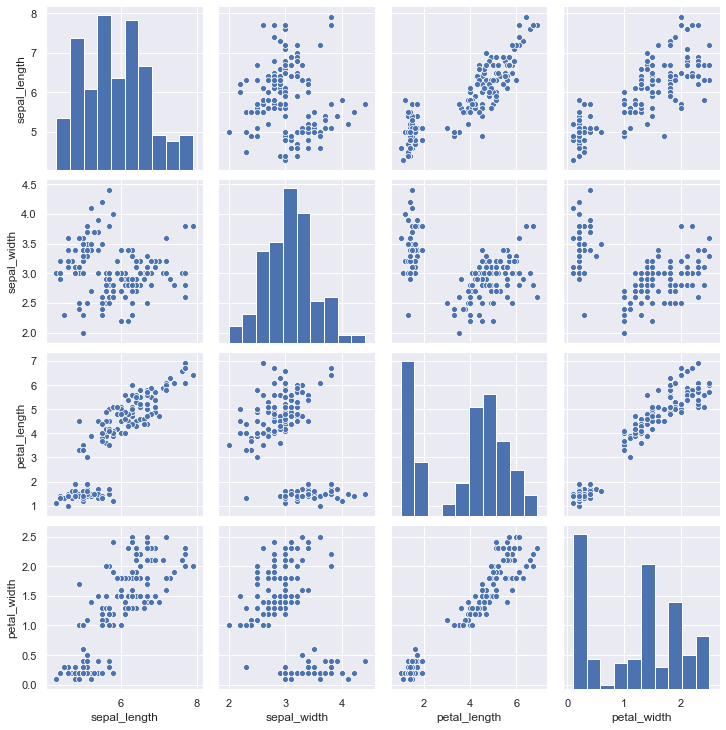

In [62]:
sns.pairplot(iris)

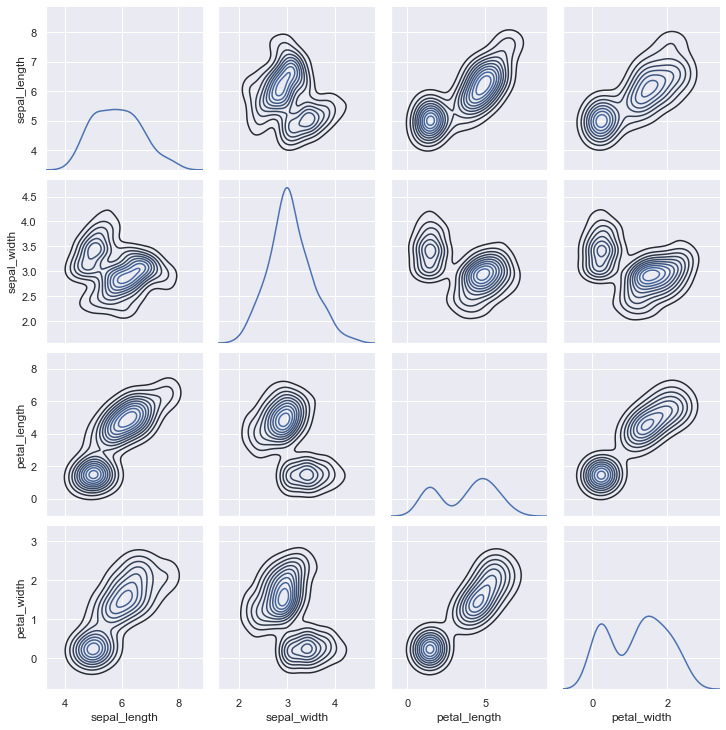

In [63]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

# Linear Regression And Relationships 

In [64]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


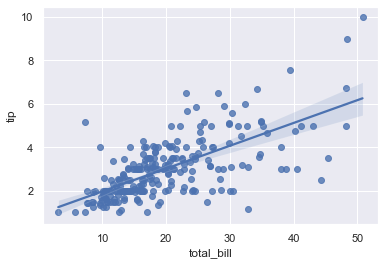

In [65]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

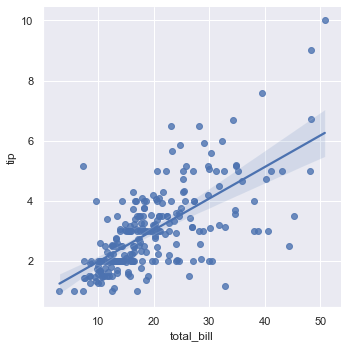

In [66]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

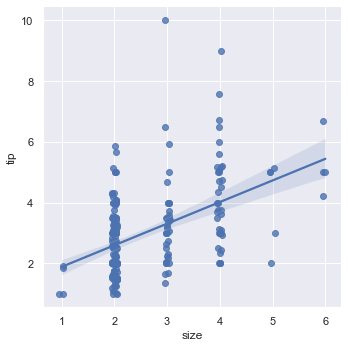

In [67]:
sns.lmplot(x = 'size', y = 'tip', 
           data = tips,
           x_jitter = 0.05   # Labels are little scatterred from line parallel to x axis
          )

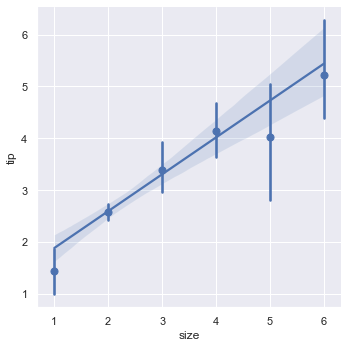

In [68]:
sns.lmplot(x = 'size', y = 'tip', 
           data = tips,
           x_estimator = np.mean   # Labels are little scatterred from line parallel to x axis
          )

In [69]:
data = sns.load_dataset('anscombe')
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [70]:
data['dataset'].value_counts()

IV     11
II     11
III    11
I      11
Name: dataset, dtype: int64

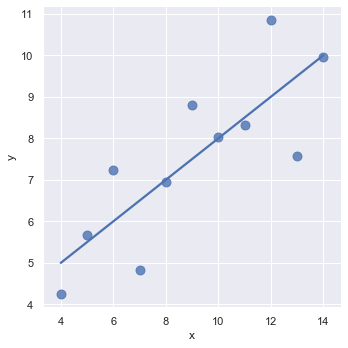

In [71]:
sns.lmplot(x = 'x', y = 'y', data = data.query('dataset == "I"'), ci = None, scatter_kws = {'s':80})

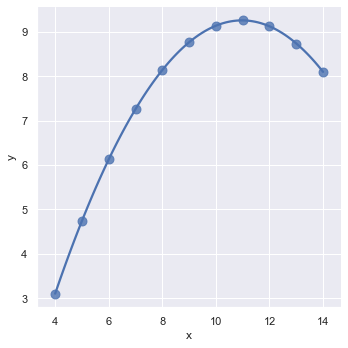

In [72]:
sns.lmplot(x = 'x', y = 'y',
           data = data.query('dataset == "II"'), 
           ci = None, 
           scatter_kws = {'s':80},
           order = 2
          )

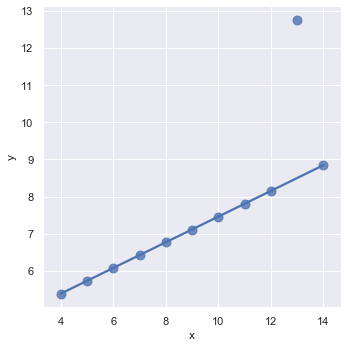

In [73]:
sns.lmplot(x = 'x', y = 'y',
           data = data.query('dataset == "III"'), 
           ci = None, 
           scatter_kws = {'s':80},
           robust = True  # Exclude the poit which afftests the graph , here at x = 13 point is excludede
          )

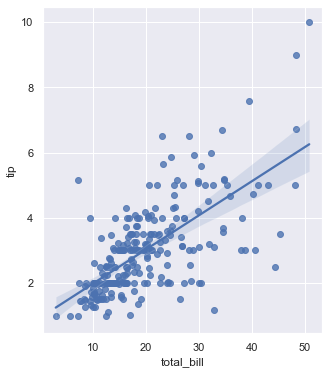

In [74]:
f, ax = plt.subplots(figsize = (5,6))
sns.regplot(x = 'total_bill', y = 'tip', 
           data = tips, 
           ax = ax
          )

# Controlling Plotted Figure Asthetics

In [75]:
def sinplot(flip = 1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

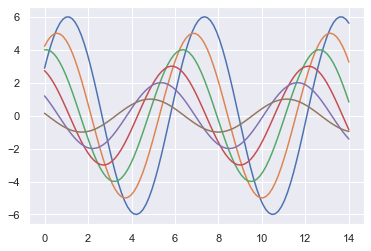

In [76]:
sinplot()

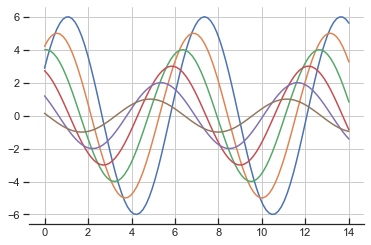

In [77]:
sns.set_style('ticks', {'axes.grid' : True, 'xtick.direction' : 'in'})
sinplot()
sns.despine(left = True)  # Removes Upper And Right Axes & Left Also

In [78]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'in',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [79]:
sns.set_style('darkgrid')

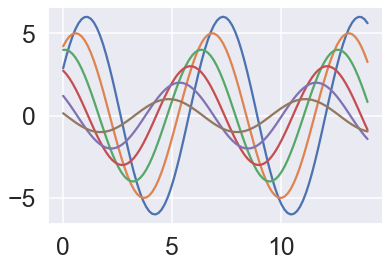

In [80]:
sns.set_context('talk', font_scale = 1.5)

sinplot()

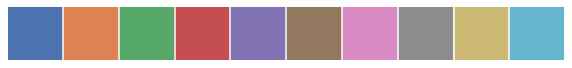

In [81]:
current_palettes = sns.color_palette()
sns.palplot(current_palettes)

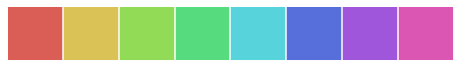

In [82]:
sns.palplot(sns.color_palette('hls' , 8))